In [75]:
import nltk
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import GridSearchCV

from wordcloud import WordCloud
# Cargar los datos
data = pd.read_excel("/home/satoru/repos/u_andes/maia/mlns/micro_projects/two/data/train_textosODS.xlsx")

In [76]:
    print(f'Duplicados: {data.duplicated().sum()}')
    print(f'Nulos:\n{data.isna().sum()}')

Duplicados: 0
Nulos:
textos    0
ODS       0
dtype: int64


In [77]:


# Preprocesamiento de texto
def preprocess_text(text):
    # stemmer = PorterStemmer()
    stemmer = SnowballStemmer("spanish")
    stop_words = set(stopwords.words('spanish'))
    # Tokenización
    text = text.lower()
    tokens = word_tokenize(text)
    # Limpieza de texto: eliminación de stopwords y caracteres especiales
    # clean_tokens = [word.lower() for word in tokens if word.isalnum()]
    # clean_tokens = [word for word in clean_tokens if word not in stopwords.words('spanish')]
    # clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    clean_tokens = [stemmer.stem(word) for word in tokens if word.isalnum() and word not in stop_words]
    # Unir tokens nuevamente en texto
    clean_text = " ".join(clean_tokens)
    return clean_text



In [78]:

# Aplicar preprocesamiento de texto a todos los datos
#ata['texto_preprocesado'] = data['textos'].apply(preprocess_text)

# Dividir los datos en conjunto de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(data['textos'], data['ODS'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(preprocessor=preprocess_text)
#X_train = vectorizer.fit_transform(data['textos'])
#X_train





([<matplotlib.patches.Wedge at 0x7f9afdceda10>,
 [Text(1.031381910450487, 0.38242823483041055, '16'),
  Text(0.5463797257485348, 0.9547089584218618, '5'),
  Text(-0.17154760691510257, 1.086541033998119, '4'),
  Text(-0.7762340304111729, 0.7793976713024146, '3'),
  Text(-1.0677305397426755, 0.26448344844397204, '7'),
  Text(-1.0689031671531202, -0.25970371435547257, '6'),
  Text(-0.8724616673148422, -0.6699333094168447, '11'),
  Text(-0.5828521930242503, -0.9328897689903252, '1'),
  Text(-0.2640491649466214, -1.0678380207180262, '13'),
  Text(0.056348253956361755, -1.0985558129999902, '8'),
  Text(0.3512170299136618, -1.0424234254364328, '14'),
  Text(0.5968247254621197, -0.9240131206195428, '2'),
  Text(0.7993373108264613, -0.7556850293083232, '10'),
  Text(0.9538187615960241, -0.5479322677370142, '9'),
  Text(1.0498853146052745, -0.32823897723485596, '15'),
  Text(1.094408692707599, -0.11076828664398439, '12')],
 [Text(0.5625719511548111, 0.20859721899840572, '11.3%'),
  Text(0.298025

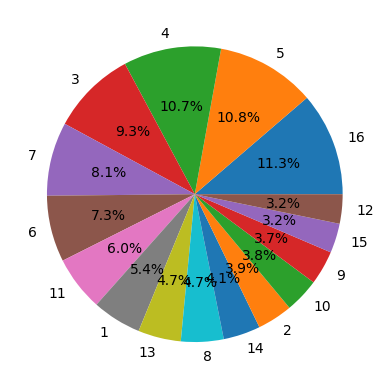

In [79]:
#Observar balance de clases

#Contar y normalizar
dfsizes = y_train.value_counts()/y_train.shape[0]
#Crear figura
fig, ax = plt.subplots()
#Pintar
ax.pie(list(dfsizes),labels=list(dfsizes.index) ,autopct='%1.1f%%')

In [81]:
# Construir el pipeline
pipeline = Pipeline([
    ('tfidf', vectorizer),
    ('svd', TruncatedSVD(n_components=100)), # Reducción de dimensionalidad
    ('clf', SVC()), # Clasificador SVM
])

# Entrenar el modelo
pipeline.fit(x_train, y_train)

# Evaluar el modelo
y_pred = pipeline.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.80      0.84      0.82        90
           2       0.80      0.86      0.83        71
           3       0.88      0.90      0.89       178
           4       0.94      0.97      0.96       200
           5       0.94      0.91      0.92       232
           6       0.92      0.89      0.90       135
           7       0.92      0.88      0.90       164
           8       0.61      0.70      0.65        86
           9       0.67      0.82      0.74        55
          10       0.69      0.55      0.61        60
          11       0.87      0.77      0.81       143
          12       0.87      0.83      0.85        64
          13       0.84      0.85      0.85       102
          14       0.93      0.89      0.91        64
          15       0.99      0.94      0.96        81
          16       0.95      0.99      0.97       207

    accuracy                           0.88      1932
   macro avg       0.85   

In [35]:
print(data['texto_preprocesado'])

0       aprendizaj educ consider sinon escolariz forma...
1       dej clar naturalez riesg pued dar lug exces in...
2       result mayor mejor acces agu pued afect aun ca...
3       congres firmement control jurisdiccion recurs ...
4       lueg dos seccion final analiz implic reconfigu...
                              ...                        
9651    implic tiemp mujer merc laboral ve afect negat...
9652    embarg fall merc implic competent sol suficien...
9653    hech hac com hac depend gran med habil capac d...
9654    destac prim estudi cas marc institucional bien...
9655    aunqu exist program convert especif profesor l...
Name: texto_preprocesado, Length: 9656, dtype: object


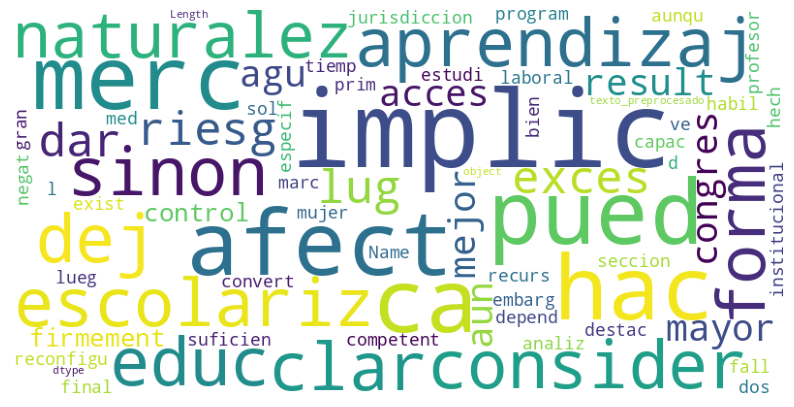

In [36]:
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color ='white',
    min_font_size=10,
    max_font_size=110
).generate(str(data['texto_preprocesado']))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()